Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0500 - loss: 2.6399
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.1500 - loss: 2.6328
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.1000 - loss: 2.6188
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.1500 - loss: 2.6069
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.1500 - loss: 2.5929
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.1500 - loss: 2.5666
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.1500 - loss: 2.5143
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.1500 - loss: 2.4761
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.1500 - loss: 2.5072
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.1500 - loss: 2.5202
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.1500 - loss: 2.4515
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.

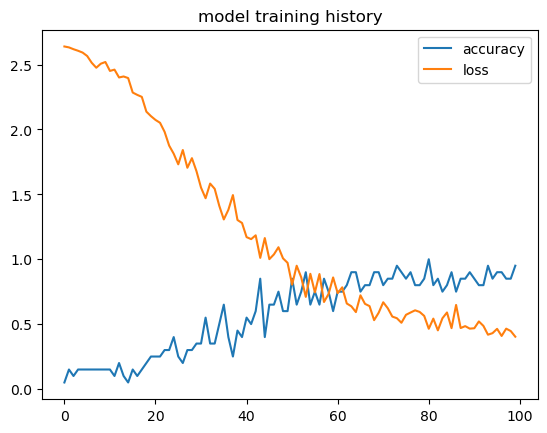

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM,Dense, Dropout

text="God created the Heaven and the Earth, God said let there be Light, and there was Light, God created the Universe"
tokenizer=Tokenizer()
tokenizer.fit_on_texts([text.lower()])
total_words=len(tokenizer.word_index)+1

input_sequences=[]
token_list=tokenizer.texts_to_sequences([line])[0]
for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])
max_len=max(len(seq) for seq in input_sequences)
input_sequences=pad_sequences(input_sequences, maxlen=max_len, padding='pre')
X,y=input_sequences[:,:-1], input_sequences[:,-1]
y= tf.keras.utils.to_categorical(y, num_classes=total_words)
model=Sequential([
    Embedding(total_words, 100, input_length=max_len-1),
    LSTM(150, return_sequences=True),Dropout(0.2),
    LSTM(150),Dropout(0.2),
    Dense(total_words, activation='softmax')])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X,y, epochs=100, verbose=1)

def generate_text(seed_text, next_words, model, max_len):
    for i in range(next_words):
        token_list=tokenizer.texts_to_sequences([seed_text.lower()])[0]
        token_list=pad_sequences([token_list], maxlen=max_len-1, padding='pre')
        predicted=np.argmax(model.predict(token_list,verbose=0),axis=1)
        word=[k for k, v in tokenizer.word_index.items() if v==predicted][0]
        seed_text+= " "+ word
    return seed_text
print(generate_text("God said",10,model, max_len))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title('model training history')
plt.legend()
plt.show()

